In [1]:
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
from scipy.integrate import quad

Rosnący impuls wykładniczy dla zmiennej $\Omega$ i stałego t

In [3]:
t_space = np.arange(-10,0,0.05)

def rosnacyImpulsWykladniczy(omega):
    plt.figure(figsize=(6,4))
    plt.grid()
    plt.plot(t_space, omega * np.e**(omega*t_space), label=r'$\xi^2$, $\Omega={}$'.format(round(omega,2)))
    plt.legend()
    plt.show()

interact(rosnacyImpulsWykladniczy, omega=(0,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='omega', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.rosnacyImpulsWykladniczy(omega)>

Malejący impuls wykładniczy dla zmiennej $\Omega$ i stałego t

In [4]:
t_space = np.arange(0.1,10,0.05)

def malejacyImpulsWykladniczy(omega):
    plt.figure(figsize=(6,4))
    plt.plot(t_space, omega * np.e**(-omega*t_space), label=r'$\xi^2$, $\Omega={}$'.format(round(omega,1)))
    plt.grid()
    plt.legend()
    plt.show()

interact(malejacyImpulsWykladniczy, omega=(0,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='omega', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.malejacyImpulsWykladniczy(omega)>

Impuls gaussowski dla zmiennej $\Omega$ i stałego t

In [5]:
t_space = np.arange(-5,5,0.05)


def impulsGaussowski(omega):
    y = ((omega**2)/(2*np.pi))**(1/2) * np.e**((-(omega**2 * t_space**2))/2)
    plt.figure(figsize=(6,4))
    plt.plot(t_space, y, label=r'$\xi^2$, $\Omega={}$'.format(round(omega,2)))
    tmax = t_space[np.argmax(y)]
    ymax = y.max()
    plt.grid()
    plt.legend()
    plt.annotate(f't={round(tmax,3)}, y={round(ymax,3)}', xy=(tmax,ymax))
    plt.show()

interact(impulsGaussowski, omega=(0,10,0.1))

interactive(children=(FloatSlider(value=5.0, description='omega', max=10.0), Output()), _dom_classes=('widget-…

<function __main__.impulsGaussowski(omega)>

Wykres prawdopodobieństwa wystąpienia elektronu dla impulsu prostokątnego dla zmiennego t i stałej $\Omega$ i $\Gamma=1$

In [6]:
t_space = np.arange(0,10,0.1)

def P_e(t, gamma, omega):
    if 0 <= t <= 2/omega:
        return 2*omega/gamma * np.e**(-gamma*t) *(np.e**(gamma*t/2) - 1)**2
    elif t > 2/omega:
        return 2*omega/gamma * np.e**(-gamma*t) *(np.e**(gamma/omega) - 1)**2
    else:
        raise ValueError


def Pe(omega):
    plt.figure(figsize=(6,4))
    P_e_space = []
    for t in t_space:
        P_e_space.append(P_e(t, 1, omega))
    P_e_space = np.array(P_e_space)
    plt.plot(t_space, P_e_space, label=f'$\Omega$ = {round(omega,2)}')
    plt.ylim(-2,2)
    tmax = t_space[np.argmax(P_e_space)]
    ymax = P_e_space.max()
    plt.grid()
    plt.legend()
    plt.annotate(f't={round(tmax,3)}, y={round(ymax,3)}', xy=(tmax,ymax))
    plt.show()

interact(Pe, omega=(0,5,0.05))

interactive(children=(FloatSlider(value=2.0, description='omega', max=5.0, step=0.05), Output()), _dom_classes…

<function __main__.Pe(omega)>

Wykres prawdopodobieństwa wystąpienia elektronu przed momentem obserwacji dla zmiennej $\Omega$ i stałej $\Gamma = 1$ 

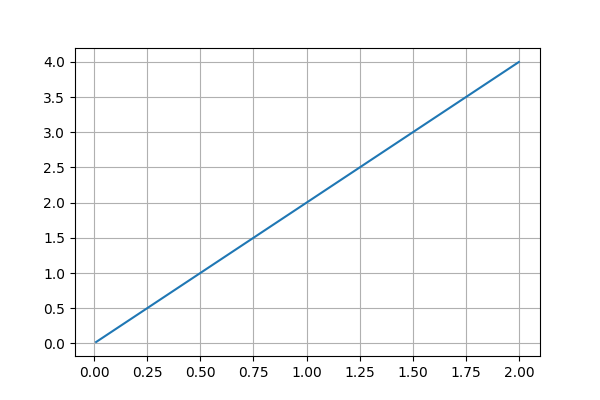

In [7]:
omega_space = np.arange(0.01,2,0.001)

plt.figure(figsize=(6,4))
plt.plot(omega_space, 2*omega_space/1)
plt.grid()
plt.show()

Wykres prawdopodobieństwa wystąpienia elektronu dla impulsu rosnącego wykładniczego dla zmiennego t i stałej $\Omega$ i $\Gamma=1$

In [8]:
t_space = np.arange(-10,10.1,0.1)

def P_e(t, gamma, omega):
    if t <= 0:
        return gamma*np.e**(-gamma*t)*(np.sqrt(omega) * (2/(omega+gamma)) *np.e**((t*(omega+gamma))/2))**2
    else:
        return gamma*np.e**(-gamma*t)*((2*np.sqrt(omega))/(omega+gamma))**2

def Pe(omega):
    plt.figure(figsize=(6,4))
    P_e_space = []
    for t in t_space:
        P_e_space.append(P_e(t, 1, omega))
    P_e_space = np.array(P_e_space)
    tmax=t_space[np.argmax(P_e_space)]
    ymax=P_e_space.max()
    plt.plot(t_space, P_e_space, label=f'$\Omega$ = {round(omega,2)}')
    plt.ylim(-2,2)
    plt.grid()
    plt.legend()
    plt.annotate(f't={round(tmax,3)}, y={round(ymax,3)}', xy=(tmax,ymax))
    plt.show()

interact(Pe, omega=(0,5,0.05))

interactive(children=(FloatSlider(value=2.0, description='omega', max=5.0, step=0.05), Output()), _dom_classes…

<function __main__.Pe(omega)>

Wykres prawdopodobieństwa wystąpienia elektronu dla impulsu malejącego wykładniczego dla zmiennego t i stałej $\Omega$ i $\Gamma=1$

In [9]:
t_space = np.arange(0,10.1,0.1)

def P_e(t, gamma, omega):
    if t <= 0:
        return 0
    else:
        if gamma == omega:
            return gamma**2 * t**2 *np.e**(-gamma*t)
        else:
            return gamma*np.e**(-gamma*t)*(np.sqrt(omega)*2/(gamma-omega)*(np.e**((t*(gamma-omega))/2) -1))**2

def Pe(omega):
    plt.figure(figsize=(6,4))
    P_e_space = []
    for t in t_space:
        P_e_space.append(P_e(t, 1, omega))
    P_e_space = np.array(P_e_space)
    tmax=t_space[np.argmax(P_e_space)]
    ymax=P_e_space.max()
    plt.plot(t_space, P_e_space, label=f'$\Omega$ = {round(omega,2)}')
    plt.ylim(-2,2)
    plt.grid()
    plt.legend()
    plt.annotate(f't={round(tmax,3)}, y={round(ymax,3)}', xy=(tmax,ymax))
    plt.show()


interact(Pe, omega=(0,5,0.05))

interactive(children=(FloatSlider(value=2.0, description='omega', max=5.0, step=0.05), Output()), _dom_classes…

<function __main__.Pe(omega)>

Dopisać wyświetlanie maksimum, zobaczyć co się dzieje, jak i czemu

Liczenie calki z gaussa numerycznie

In [15]:
sigma = 1
mi = 0

def Gauss(x, sigma, mi):
    return np.exp((-(x-mi)**2)/(2*(sigma**2)))/(sigma*np.sqrt(2*np.pi))

integrate = quad(lambda x: Gauss(x, sigma, mi), -1,1)
print(integrate)

(0.682689492137086, 7.579375928402476e-15)
